In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
corpus = [
    "I loved the movie. It was fantastic and thrilling!",
    "The film was not good, I disliked the storyline.",
    "Amazing acting and a gripping plot.",
    "Boring and predictable. Not worth my time.",
    "It was a wonderful experience to watch this movie.",
    "Terrible script and weak performances."
]

stop_words = ["and", "the", "was", "not", "my", "to", "this"]

vectorizer = CountVectorizer(stop_words=stop_words)
X_bow = vectorizer.fit_transform(corpus)

print("Слова в словаре:", vectorizer.get_feature_names_out())
print("Матрица 'мешка слов':\n", X_bow.toarray())


Слова в словаре: ['acting' 'amazing' 'boring' 'disliked' 'experience' 'fantastic' 'film'
 'good' 'gripping' 'it' 'loved' 'movie' 'performances' 'plot'
 'predictable' 'script' 'storyline' 'terrible' 'thrilling' 'time' 'watch'
 'weak' 'wonderful' 'worth']
Матрица 'мешка слов':
 [[0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0]]


In [3]:
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(corpus)

print("Слова в словаре TF-IDF:", tfidf_vectorizer.get_feature_names_out())
print("Матрица TF-IDF:\n", X_tfidf.toarray())


Слова в словаре TF-IDF: ['acting' 'amazing' 'boring' 'disliked' 'experience' 'fantastic' 'film'
 'good' 'gripping' 'it' 'loved' 'movie' 'performances' 'plot'
 'predictable' 'script' 'storyline' 'terrible' 'thrilling' 'time' 'watch'
 'weak' 'wonderful' 'worth']
Матрица TF-IDF:
 [[0.         0.         0.         0.         0.         0.47974754
  0.         0.         0.         0.39339985 0.47974754 0.39339985
  0.         0.         0.         0.         0.         0.
  0.47974754 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.5        0.         0.
  0.5        0.5        0.         0.         0.         0.
  0.         0.         0.         0.         0.5        0.
  0.         0.         0.         0.         0.         0.        ]
 [0.5        0.5        0.         0.         0.         0.
  0.         0.         0.5        0.         0.         0.
  0.         0.5        0.         0.         0.         0.
  0.         0.         0.  

In [4]:
lda = LatentDirichletAllocation(n_components=3, max_iter=10, random_state=42)
lda.fit(X_tfidf)

n_top_words = 5
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Тема #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))


Тема #1:
acting plot amazing gripping watch
Тема #2:
fantastic loved thrilling it movie
Тема #3:
predictable worth boring time weak


In [5]:
ngram_vectorizer = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 3))
X_ngram = ngram_vectorizer.fit_transform(corpus)

print("N-граммы:", ngram_vectorizer.get_feature_names_out())
print("Матрица N-грамм:\n", X_ngram.toarray())


N-граммы: ['acting' 'acting gripping' 'acting gripping plot' 'amazing'
 'amazing acting' 'amazing acting gripping' 'boring' 'boring predictable'
 'boring predictable worth' 'disliked' 'disliked storyline' 'experience'
 'experience watch' 'experience watch movie' 'fantastic'
 'fantastic thrilling' 'film' 'film good' 'film good disliked' 'good'
 'good disliked' 'good disliked storyline' 'gripping' 'gripping plot' 'it'
 'it fantastic' 'it fantastic thrilling' 'it wonderful'
 'it wonderful experience' 'loved' 'loved movie' 'loved movie it' 'movie'
 'movie it' 'movie it fantastic' 'performances' 'plot' 'predictable'
 'predictable worth' 'predictable worth time' 'script' 'script weak'
 'script weak performances' 'storyline' 'terrible' 'terrible script'
 'terrible script weak' 'thrilling' 'time' 'watch' 'watch movie' 'weak'
 'weak performances' 'wonderful' 'wonderful experience'
 'wonderful experience watch' 'worth' 'worth time']
Матрица N-грамм:
 [[0.         0.         0.         0.        

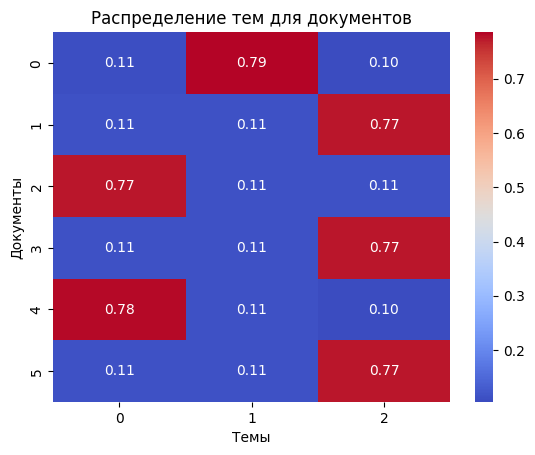

In [6]:
document_topics = lda.transform(X_tfidf)
sns.heatmap(document_topics, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Распределение тем для документов")
plt.xlabel("Темы")
plt.ylabel("Документы")
plt.show()


   Выводы по работе
1. "Мешок слов" позволяет представить текстовые данные в виде числовой матрицы частот слов, но игнорирует порядок слов.
2. TF-IDF масштабирует частоты, подчеркивая уникальные слова для конкретного документа.
3. LDA эффективно группирует документы по темам, но интерпретация тем может быть субъективной.
4. Использование n-грамм добавляет контекст, позволяя учитывать порядок слов и их комбинации.
5. Итоговые результаты демонстрируют, что применение различных методов может существенно улучшить анализ текстовых данных.
